# A Sigh of Relief: Taking the Guesswork out of Pitching Changes

# Introduction

<t>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Since the introduction of Sabermetrics in 1974, Major League Baseball has remained at the forefront of statistical analysis in professional sports.  Given the ease of access to extremely revealing data, teams rely on analytics to make both in and out of game decisions.  For managers, the most significant of these decisions is choosing when to pull their starting pitcher.  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We set out to develop a model that could, in the place of a manager, decide whether or not to remove the starting pitcher from a given game during after throwing a given pitch.  The model is practically useful because managers are often thrown out of games, forcing the pitching coach to make personnel decisions in lieu of the manager.  These decisions don't always align with that of the manager, so our model could be used to help these coaches avoid the embarrassment of a bad decision.  Also, our model could be used by the hitting team in order to make pinch hitting decisions.  By accurately predicting when a pitcher will be pulled, a manager can make more informed substitutions and ensure that they utilize their pinch hitters with maximum efficiency.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Luckily, we were able to find a richly detailed dataset that included over 50 data points for each pitch for the 2014, 2015, and 2016 regular seasons.  Variables included the state of the game (score, pitcher, batter, baserunners, etc.) and various pitch-by-pitch metrics such as release point, pitch location, and the result of each pitch.  We focused specifically on the game state -- and developed a model using a decision tree that can predict whether or not a pitcher will be pulled from a game after a given pitch with up to 99.65% accuracy.<t/>



# Methodology

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In order to build our model, we first had to decide exactly who we were going to focus on.  Originally, we sought out to develop a model that could predict when any pitcher is pulled.  However, we realized that relief pitching is too hectic and unpredictable to fit a reasonable model.  Thus, we decided to remove all relievers from our dataset.  Since one of the few things the original dataset did not include was position, we had to write methods that determined which pitchers were starting games, which we wrote to a new file called ‘startersOnly_201x.csv’ (code in cleanRelievers.py).

In [1]:
import cleanRelievers as cr
# uncomment to clean relievers for specified year(s), or run from command line as shown by readme
#cr.clean("2014.csv")
#cr.clean("2015.csv")
#cr.clean("2016.csv")

Conversion to starters only complete for 2014.csv
Conversion to starters only complete for 2015.csv
Conversion to starters only complete for 2016.csv


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;After removing relievers, we had to begin thinking about which features we wanted to include in our model.  Originally, we tried the model on a set of variables already in the dataset, such as the score, release velocity, and result of the last pitch, but our results weren’t much better than always guessing 'no' for a pitcher being pulled after a given pitch.  This was because each pitch only contains the result of that pitch -- it doesn’t take into account cumulative totals, such as hit count, walk count, runs given up, and pitch count (metrics which all managers consider when deciding whether or not to pull a pitcher).  So we decided to rewrite the file with a handful of new, added variables.  We added 15 new fields to our dataset, all of which were generated by processing the starters only dataset and extracting valuable metrics.

In [2]:
import add_new_fields as anf
# adds new fields and can create csv file for a specific pitcher or for all pitchers combined
# uncomment to add_new_fields and specify parameters, or run from command line as shown by readme
# parameters are: filename, all/pitcherID, and inning cut off

# example below adds new fields for all pitchers in all innings in 2014
anf.main(["python","startersOnly_2014.csv", "all", "1"])

# example below adds new fields for all pitchers after the 5th inning in 2015
anf.main(["python","startersOnly_2015.csv", "all", "6"])

# example below adds new fields for all of Adam Wainright's pitches in 2015
anf.main(["python","startersOnly_2015.csv", "425794", "1"])


Pitcher(s) written successfully
Pitcher(s) written successfully
Pitcher(s) written successfully


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We initially examined quality of pitch data, such as release velocity, spin rate, and the probability of being called a strike.  Surprisingly, there was little correlation between these metrics and whether or not a pitcher would be pulled. The below tableau graphs highlight the changes in these values as pitch count increased, disproving our initial theory that pitchers would be removed as they "tired" over time (i.e. release velocity, etc. decrease over time). These variables, surprisingly trend upward in some cases as pitch count increases.  

In [3]:
import Season_Pitch_Count as spc
import Add_Pitch_Count as apc

#game pitch count and season pitch count were used to create below tableau graphs, but ended up not being useful later

#uncomment if you want to create these datafiles
#adds season and past week pitch counts
#spc.main()
#adds game pitch count
#apc.main()

# Tableau graphs
<img src = "files/Images/game pitch count.jpg">
<img src = "files/Images/week and season pitch count.jpg">

Once we had all of our data parsed and our new fields added, we visualized the data using matplotlib in order determine the effect that a given feature had on the likelihood of a pitcher being pulled.  

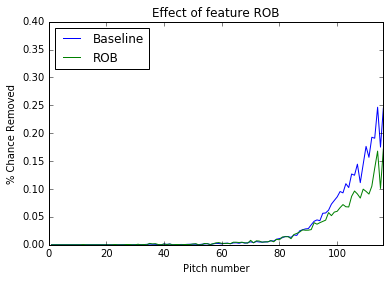

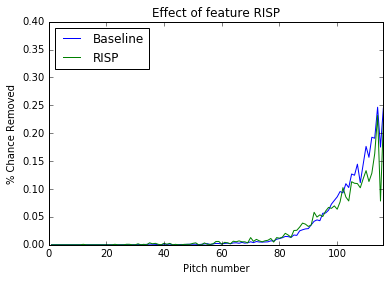

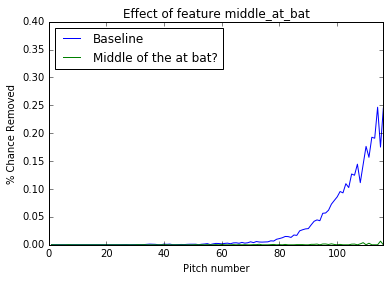

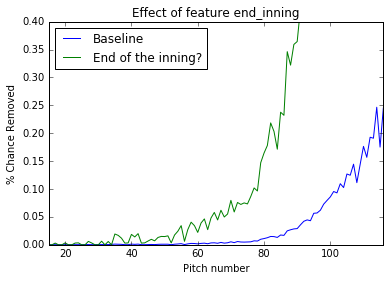

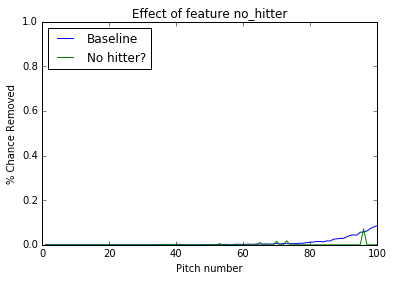

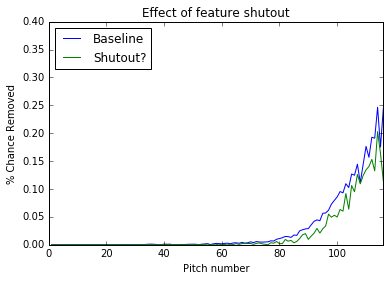

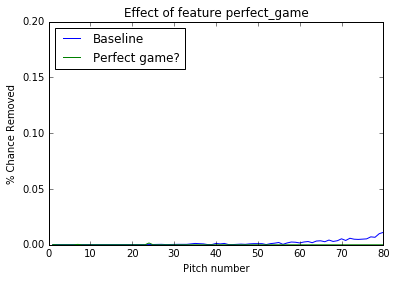

In [4]:
import graphs as g

#creates graphs for the specific file.  Can be run on either combined pitcher data files or on pitcher specific data files. 
#Works best on data files that include data from all innings
g.initialize_graphs("new_fields_all_startersOnly_2014.csv")

#example graphs for 2014 shown below

<img src = "files/Images/effect of ROB.jpg">
<img src = "files/Images/effect of RISP.jpg">
<img src = "files/Images/effect of no_hitter.jpg">
<img src = "files/Images/effect of middle_at_bat.jpg">
<img src = "files/Images/effect of end_inning.jpg">
<img src = "files/Images/effect of shutout.jpg">
<img src = "files/Images/effect of perfect_game.jpg">

 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Finally, we were ready to implement our model and test our predictions.  Given the high infogain on a few features such as middle_at_bat, end_inning, and pitch_number, we decided that a decision tree would produce the most accurate predictions (especially when fed different pitchers who pitch in different ways over time).  Using the new fields we added as features, we modified our code to work with the decision tree we implemented previously.  We also implemented both the naive bayes and linear regression models using sci-kit learn to test our results with different methods and to improve the veracity of the resuls. We tested naive bayes and linear regression with the most imortant features, identified in the tree model.

In [5]:
import tree as t

#creates a decision tree on specified file.  Flag specifies either a combined model on all pitchers or models created for each
#individual pitcher and returns average of all models. a for all pitchers, p for pitcher specific.  Depth specifies max tree depth.
#t.main(["python","filename","flag","depth"])

t.main(["python","new_fields_all_startersOnly_2014.csv","a","6"])



Data Preparation Complete.

Split on end_inning (info gain = 0.0425105113487):
end_inning=False==>
 Label = False
end_inning=True==>
  Split on B_pitch_number (info gain = 0.320237881418):
  B_pitch_number=91-95==>
    Split on ROB (info gain = 0.207255050333):
    ROB=False==>
      Split on paResult (info gain = 0.0412966812033):
      paResult=STRIKEOUT==>
        Split on B_total_bases (info gain = 0.0302905862597):
        B_total_bases=0-7==>
          Split on inning (info gain = 0.0399857263788):
          inning=5==>
           Label = False
          inning=4==>
           Label = False
          inning=7==>
           Label = False
          inning=6==>
           Label = False
          inning=9==>
           Label = True
          inning=8==>
           Label = False
        B_total_bases=8-13==>
            Split on inning (info gain = 0.0467688952607):
            inning=8==>
             Label = False
            inning=5==>
             Label = False
            innin

In [7]:
import machine_learn as ml

#ml.main(["python","filename","flag","fields"])
#runs either naive bayes or logistic regression on specified filename with specified comma-seperated fields
#flag = nb for naive bayes, lr for logistic regression

#naive bayes
ml.main(["python","new_fields_all_startersOnly_2014.csv","nb","end_inning","paResult","score_for","pitch_count","score_against","inning"])

#logistic regression
ml.main(["python","new_fields_all_startersOnly_2015.csv","lr","end_inning","paResult","score_for","pitch_count","score_against","inning"])

Naive Bayes
correct pct: 0.966193276095
all false correct pct: 0.989525276334
Logistic Regression
correct pct: 0.981219189612
all false correct pct: 0.958133942527


<img src = "files/Images/machine_learn sample output.jpg">

# Results

<img src = "files/Images/Results Table.jpg">

<img src = "files/Images/final model accuracy.jpg">

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Our decision tree is able to predict with 99.65% accuracy whether a pitch will be a pitcher’s last pitch for that game on the dataset which includes all pitches.  Since the vast majority of pitches are not a pitcher’s last pitch, the naive assumption of always classifying a pitch as "not the last pitch" is also very accurate, predicting 98.95% of pitches correctly.  Our model is a significant improvement on the always false assumption; we misidentify one-third as many pitches as the always false assumption does.  
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Since the vast majority of pitches are not a pitcher’s last pitch, we also narrowed the dataset to only include pitches from the 6th inning and on, when pitchers are more likely to be pulled.  On this constrained dataset our decision tree predicts with 98.17% accuracy whether a pitch will be a pitcher’s last for that game.  This is an even bigger improvement over the always false assumption which is accurate 95.78% of the time. 
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In addition to creating a model based off of all pitcher data which predicts whether a pitch will be a pitcher’s last, we also can create individual models for each specific pitcher.  These models are more accurate than the general model and on average identify 99.98% of pitches accurately -- an improvement of .3% over the general model and significantly better than the always false assumption which identifies 98.9% accurately.  This model misidentifies roughly one-third as many pitches as the general model and around one-tenth as many pitches as the always false assumption.  
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In addition to our decision tree, we also created naive bayes and linear regression models to predict whether a pitch will be the last pitch of the game for a starting pitcher.  The results are shown above in table 1.  Neither of these models are as accurate as the decision tree and they are both more reliant on including the end_inning field.  In fact, without the end_inning field, the naive bayes model performs worse than always classifying a pitch as "not the last pitch."  
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Other than our models which predict whether a given pitch will be a pitcher’s last, our main discovery is that the most important determinant of whether a pitcher will be pulled after a pitch is whether or not it is the last pitch of an inning.  For each different model, it is the most important variable. When we exclude end_inning, all models perform noticeably worse, sometimes worse than a model which doesn’t classify any pitch as a last pitch (always false assumption).  From this, we can conclude that baseball managers are far more likely to pull a pitcher at the end of an inning than in the middle of an inning.  There may be some benefit to pulling a pitcher at the end of an inning, such as preventing a reliever from having to cool down between innings.  Cooling down between innings is a significant source of fatigue for pitchers, and relievers are less accustomed to handling this fatigue than starters.  
       
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;However, we believe that this effect is minor when compared to the benefit from having better pitching on the field.  As a result, we believe that baseball managers are likely to pull pitchers at the end of an inning when they should consider focusing on changing pitchers when doing so would result in higher quality pitching.  Identifying the optimal time to change pitchers is outside the scope of this research, but would be an interesting topic to study further.

# Conclusion

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In conclusion, we were able to create a model that can predict with 99.6% accuracy whether or not a starting pitcher will be pulled after a given pitch.  When using the model on individual pitchers, our accuracy increases to 99.9%. Though our model takes into account many different variables, the end_inning variable proved wholly invaluable, with the accuracy dipping to 99.2% without it, versus the always false assumption of 98.95%. In reality, a pitcher is much more likely to be pulled at the end of an inning. Whether that is due to tradition or other factors, we are unable to say. Regardless, this prediction model might one day be able to inform, maybe even replace, a manager, or free him up to focus on things other than when to remove his starting pitcher. For a future implementation, we would like to be able to preemptively state when a pitcher should be removed, not just predict with accuracy when he will be pulled. This will be helpful in avoiding injury, possibly avoiding unnecessary fatigue, and avoiding the tradition or guess work of simply removing a pitcher at the end of the inning. One day, we imagine statistical modeling could remove managers entirely, predicting batting order, position changes, and pitching decisions. This model is a first step in that direction. 